# Linear regression

## 1. Load and preview data

In [2]:
library(carData)

In [5]:
?Prestige

Prestige {carData},R Documentation


In [6]:
data <- Prestige

In [8]:
data |> head()

,education,income,women,prestige,census,type
,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof


In [10]:
str(data)

'data.frame':	102 obs. of  6 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...
 $ census   : int  1113 1130 1171 1175 2111 2113 2133 2141 2143 2153 ...
 $ type     : Factor w/ 3 levels "bc","prof","wc": 2 2 2 2 2 2 2 2 2 2 ...


In [12]:
summary(data)

   education          income          women           prestige    
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27  
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20  
     census       type   
 Min.   :1113   bc  :44  
 1st Qu.:3120   prof:31  
 Median :5135   wc  :23  
 Mean   :5402   NA's: 4  
 3rd Qu.:8312            
 Max.   :9517            

In [18]:
library(dplyr)
cor(data |> select(-type))

,education,income,women,prestige,census
education,1.00000000,0.5775802,0.06185286,0.8501769,-0.8230882
income,0.57758023,1.0000000,-0.44105927,0.7149057,-0.3610023
women,0.06185286,-0.4410593,1.00000000,-0.1183342,-0.2270028
prestige,0.85017689,0.7149057,-0.11833419,1.0000000,-0.6345103
census,-0.82308821,-0.3610023,-0.22700277,-0.6345103,1.0000000


In [20]:
anyNA(data)

[1] TRUE

In [22]:
complete.cases(data)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [24]:
na.omit(data)

,education,income,women,prestige,census,type
,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
physicists,15.64,11030,5.13,77.6,2113,prof
biologists,15.09,8258,25.65,72.6,2133,prof
architects,15.44,14163,2.69,78.1,2141,prof
civil.engineers,14.52,11377,1.03,73.1,2143,prof


In [26]:
data[is.na(data$type), "type"] <- "bc"

In [28]:
anyNA(data)

[1] FALSE

## 2. Train test split

In [29]:
set.seed(2024)

train_index <- sample(nrow(data), size = round(0.7*nrow(data)))

In [31]:
length(train_index)

[1] 71

In [33]:
train <- data[train_index,]
test <- data[-train_index,]

In [35]:
head(train)

,education,income,women,prestige,census,type
,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>
elevator.operators,7.58,3582,30.08,20.1,6193,bc
bookkeepers,11.32,4348,68.24,49.4,4131,wc
telephone.operators,10.51,3161,96.14,38.1,4175,wc
cooks,7.74,3116,52.00,29.7,6121,bc
lawyers,15.77,19263,5.13,82.3,2343,prof
commercial.artists,11.09,6197,21.03,57.2,3314,prof


3. EDA 

In [40]:
cor(data |> select(-type))

,education,income,women,prestige,census
education,1.00000000,0.5775802,0.06185286,0.8501769,-0.8230882
income,0.57758023,1.0000000,-0.44105927,0.7149057,-0.3610023
women,0.06185286,-0.4410593,1.00000000,-0.1183342,-0.2270028
prestige,0.85017689,0.7149057,-0.11833419,1.0000000,-0.6345103
census,-0.82308821,-0.3610023,-0.22700277,-0.6345103,1.0000000


In [41]:
install.packages("corrplot")

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpg9nBwb\downloaded_packages


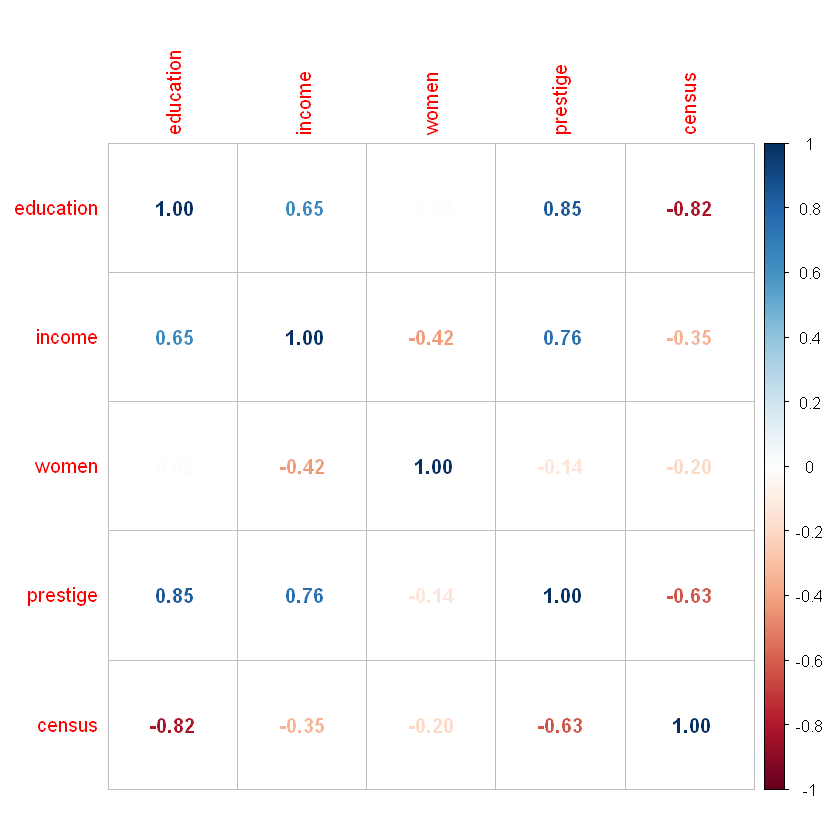

In [43]:
library(corrplot)
corrplot(cor(train[,-6]) , method = "number") 

In [45]:
library(ggplot2)

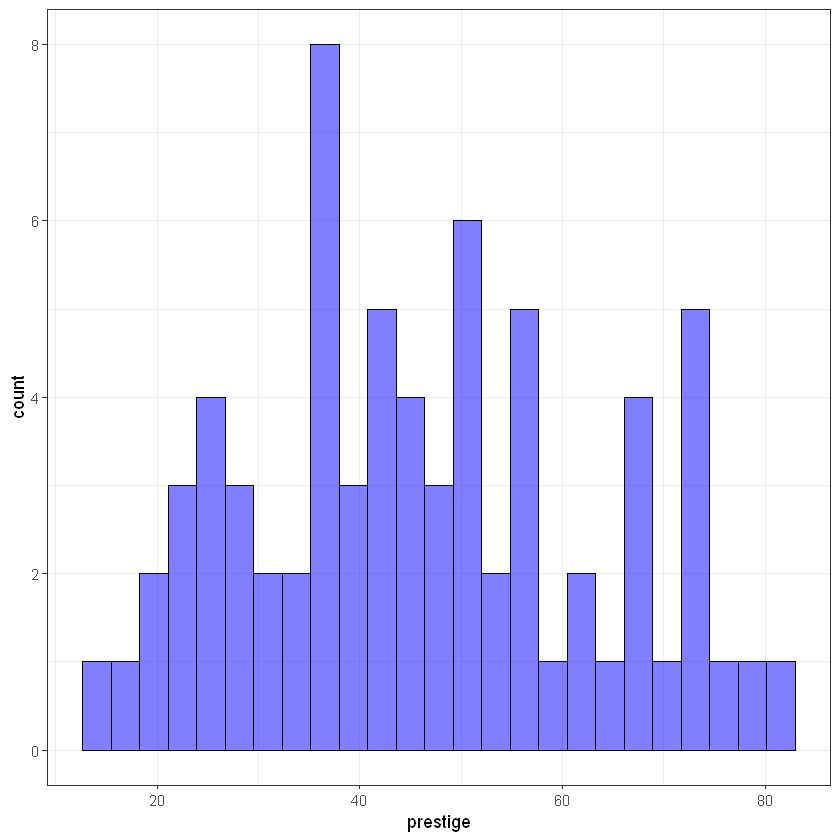

In [47]:
ggplot(train, aes(prestige)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

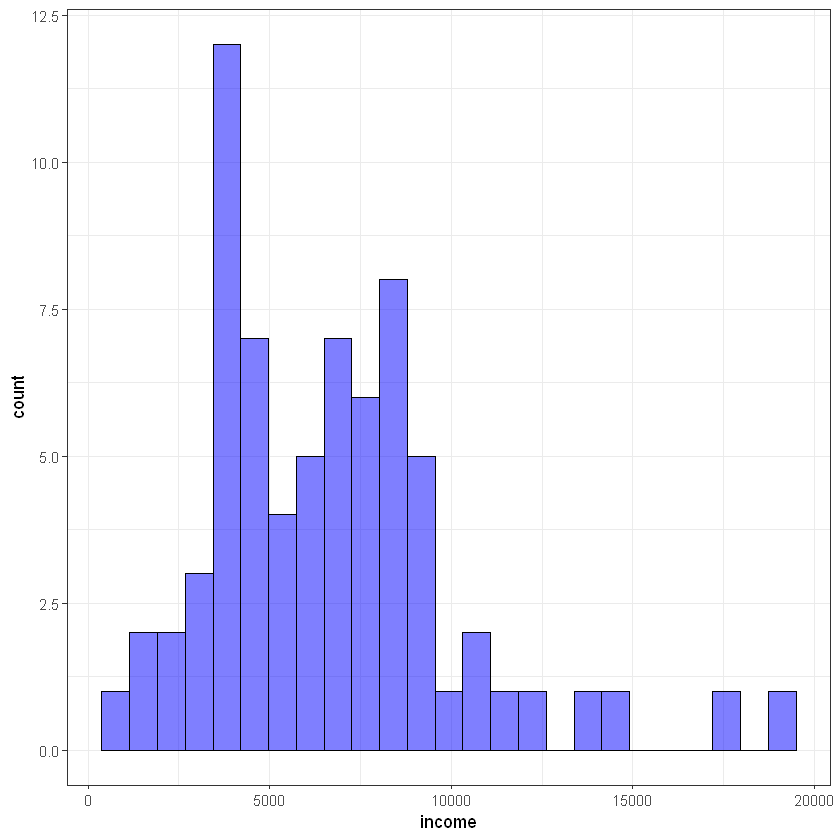

In [49]:
ggplot(train, aes(income)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

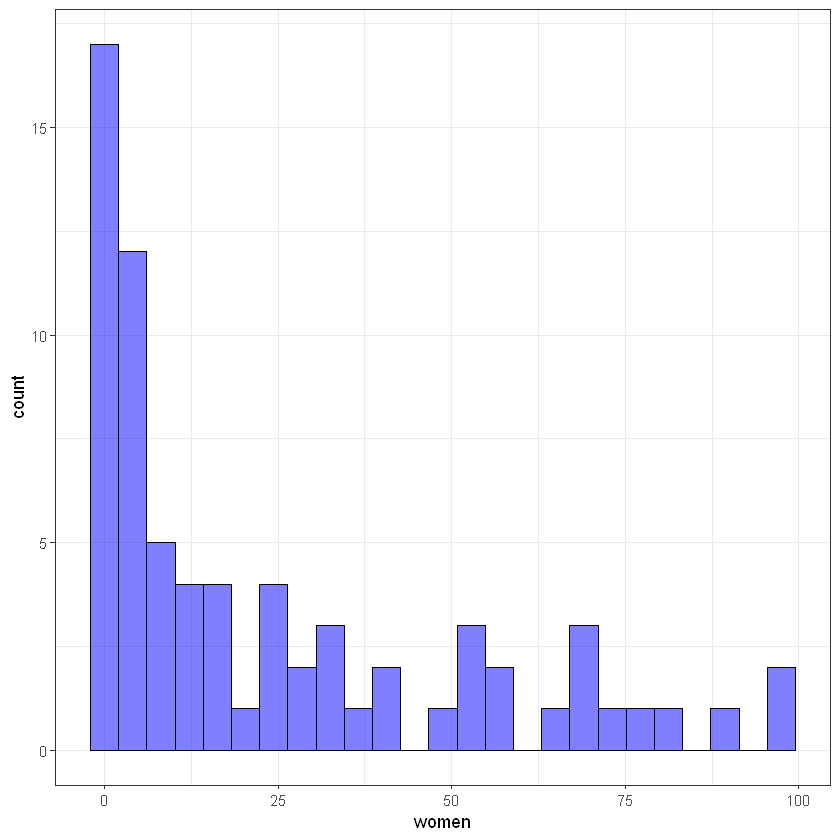

In [51]:
ggplot(train, aes(women)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

## 4. Model building

In [54]:
lm_model <- lm(prestige ~ education, data = train)

In [56]:
summary(lm_model)


Call:
lm(formula = prestige ~ education, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.437  -5.954   1.032   6.703  17.376 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.9845     4.2435  -2.117   0.0378 *  
education     5.2205     0.3896  13.399   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.998 on 69 degrees of freedom
Multiple R-squared:  0.7224,	Adjusted R-squared:  0.7184 
F-statistic: 179.5 on 1 and 69 DF,  p-value: < 2.2e-16


In [58]:
# prestige = -8.98 + 5.22*education

In [60]:
library(broom)

In [63]:
tidy(lm_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.984455,4.2435146,-2.11722,3.784807e-02
education,5.220529,0.3896172,13.39912,7.056207e-21


In [67]:
lm_model <- lm(prestige ~ education + income, data = train)
summary(lm_model)


Call:
lm(formula = prestige ~ education + income, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7525  -4.5878   0.4582   4.7086  17.3600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.6264724  3.7225239  -1.511    0.135    
education    3.8021103  0.4408681   8.624 1.61e-12 ***
income       0.0017458  0.0003512   4.972 4.76e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.762 on 68 degrees of freedom
Multiple R-squared:  0.7964,	Adjusted R-squared:  0.7904 
F-statistic:   133 on 2 and 68 DF,  p-value: < 2.2e-16


In [68]:
lm_model <- lm(prestige ~ log(education) + income, data = train)
summary(lm_model)


Call:
lm(formula = prestige ~ log(education) + income, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.0756  -5.3409   0.2461   4.6585  18.9241 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.470e+01  9.643e+00  -5.673 3.14e-07 ***
log(education)  3.791e+01  4.689e+00   8.084 1.54e-11 ***
income          1.919e-03  3.541e-04   5.419 8.53e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.021 on 68 degrees of freedom
Multiple R-squared:  0.7826,	Adjusted R-squared:  0.7762 
F-statistic: 122.4 on 2 and 68 DF,  p-value: < 2.2e-16


In [70]:
lm_model <- lm(prestige ~ log(education) + log(income), data = train)
summary(lm_model)


Call:
lm(formula = prestige ~ log(education) + log(income), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.633  -5.746   0.257   4.155  19.322 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -160.578     13.909 -11.545  < 2e-16 ***
log(education)   37.051      4.076   9.091 2.31e-13 ***
log(income)      13.915      1.963   7.089 9.82e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.278 on 68 degrees of freedom
Multiple R-squared:  0.821,	Adjusted R-squared:  0.8157 
F-statistic: 155.9 on 2 and 68 DF,  p-value: < 2.2e-16


In [76]:
lm_model <- lm(prestige ~ log(education) + log(income), data = train)
summary(lm_model)


Call:
lm(formula = prestige ~ log(education) + log(income), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.633  -5.746   0.257   4.155  19.322 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -160.578     13.909 -11.545  < 2e-16 ***
log(education)   37.051      4.076   9.091 2.31e-13 ***
log(income)      13.915      1.963   7.089 9.82e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.278 on 68 degrees of freedom
Multiple R-squared:  0.821,	Adjusted R-squared:  0.8157 
F-statistic: 155.9 on 2 and 68 DF,  p-value: < 2.2e-16


In [80]:
library(modelr)

In [84]:
lm_model1 <- lm(prestige ~ income, data = train)
summary(lm_model1)


Call:
lm(formula = prestige ~ income, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.877  -8.028  -2.094   6.279  33.998 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.144e+01  2.876e+00   7.453 1.99e-10 ***
income      3.706e-03  3.846e-04   9.636 2.10e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.15 on 69 degrees of freedom
Multiple R-squared:  0.5737,	Adjusted R-squared:  0.5675 
F-statistic: 92.85 on 1 and 69 DF,  p-value: 2.103e-14


In [87]:
r_df <- data.frame(
    Model = c("Base line"),
    R2_Train = rsquare(lm_model1, train),
    R2_Test = rsquare(lm_model1, test)
)
r_df

Model,R2_Train,R2_Test
<chr>,<dbl>,<dbl>
Base line,0.5736839,0.2501919


In [89]:
lm_model2 <- lm(prestige ~ income + education, data = train)
summary(lm_model2)


Call:
lm(formula = prestige ~ income + education, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7525  -4.5878   0.4582   4.7086  17.3600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.6264724  3.7225239  -1.511    0.135    
income       0.0017458  0.0003512   4.972 4.76e-06 ***
education    3.8021103  0.4408681   8.624 1.61e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.762 on 68 degrees of freedom
Multiple R-squared:  0.7964,	Adjusted R-squared:  0.7904 
F-statistic:   133 on 2 and 68 DF,  p-value: < 2.2e-16


In [91]:
r_df <- r_df |>
    bind_rows(data.frame(
    Model = c("+ Edu"),
    R2_Train = rsquare(lm_model2, train),
    R2_Test = rsquare(lm_model2, test)
))
r_df

Model,R2_Train,R2_Test
<chr>,<dbl>,<dbl>
Base line,0.5736839,0.2501919
+ Edu,0.7963876,0.7810138
+ Edu,0.7963876,0.7810138


In [92]:
lm_model3 <- lm(prestige ~ log(income) + log(education), data = train)
summary(lm_model3)


Call:
lm(formula = prestige ~ log(income) + log(education), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.633  -5.746   0.257   4.155  19.322 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -160.578     13.909 -11.545  < 2e-16 ***
log(income)      13.915      1.963   7.089 9.82e-10 ***
log(education)   37.051      4.076   9.091 2.31e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.278 on 68 degrees of freedom
Multiple R-squared:  0.821,	Adjusted R-squared:  0.8157 
F-statistic: 155.9 on 2 and 68 DF,  p-value: < 2.2e-16


In [94]:
r_df <- r_df |>
    bind_rows(data.frame(
    Model = c("Log"),
    R2_Train = rsquare(lm_model3, train),
    R2_Test = rsquare(lm_model3, test)
))
r_df

Model,R2_Train,R2_Test
<chr>,<dbl>,<dbl>
Base line,0.5736839,0.2501919
+ Edu,0.7963876,0.7810138
+ Edu,0.7963876,0.7810138
Log,0.8210033,0.7886101
Log,0.8210033,0.7886101


In [98]:
library(car)
vif(lm_model2)

income education 
 1.720503  1.720503

In [104]:
lm_model5 <- lm(prestige ~ log(income) + log(education) + education*income +income^2, data = train)
summary(lm_model5)


Call:
lm(formula = prestige ~ log(income) + log(education) + education * 
    income + income^2, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.723  -5.204   1.326   3.622  16.143 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.162e+01  7.195e+01   1.134  0.26080    
log(income)       5.084e+00  6.215e+00   0.818  0.41628    
log(education)   -1.218e+02  3.579e+01  -3.403  0.00114 ** 
education         1.846e+01  4.280e+00   4.313 5.58e-05 ***
income            6.660e-03  2.889e-03   2.305  0.02434 *  
education:income -4.687e-04  1.703e-04  -2.752  0.00766 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.464 on 65 degrees of freedom
Multiple R-squared:  0.865,	Adjusted R-squared:  0.8547 
F-statistic: 83.32 on 5 and 65 DF,  p-value: < 2.2e-16


In [105]:
vif(lm_model5)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



log(income)   log(education)        education           income 
        19.10051        146.95684        233.80158        167.94069 
education:income 
       160.80498

In [108]:
lm_model6 <- lm(prestige ~ log(income) + log(education) + education*income +income^2 + education + income, data = train)
vif(lm_model6)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



log(income)   log(education)        education           income 
        19.10051        146.95684        233.80158        167.94069 
education:income 
       160.80498

In [110]:
lm_model7 <- lm(prestige ~ log(income) + log(education) + type, data = train)
summary(lm_model7)


Call:
lm(formula = prestige ~ log(income) + log(education) + type, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3602  -3.9438   0.4233   4.6210  16.4688 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -119.4515    17.7013  -6.748 4.53e-09 ***
log(income)      12.5658     1.8424   6.820 3.38e-09 ***
log(education)   22.9023     6.6796   3.429  0.00105 ** 
typeprof         11.3955     3.8164   2.986  0.00396 ** 
typewc            0.2472     2.7451   0.090  0.92851    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.653 on 66 degrees of freedom
Multiple R-squared:  0.8548,	Adjusted R-squared:  0.846 
F-statistic: 97.15 on 4 and 66 DF,  p-value: < 2.2e-16


In [111]:
r_df <- r_df |>
    bind_rows(data.frame(
    Model = c("Log"),
    R2_Train = rsquare(lm_model7, train),
    R2_Test = rsquare(lm_model7, test)
))
r_df

Model,R2_Train,R2_Test
<chr>,<dbl>,<dbl>
Base line,0.5736839,0.2501919
+ Edu,0.7963876,0.7810138
+ Edu,0.7963876,0.7810138
Log,0.8210033,0.7886101
Log,0.8210033,0.7886101
Log,0.8548172,0.8098413


In [117]:
lm_model9 <- lm(prestige ~ income + education + type + women, data = train)
summary(lm_model9)


Call:
lm(formula = prestige ~ income + education + type + women, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.1916  -4.3011  -0.2138   5.6119  15.3695 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.172e+00  6.454e+00   0.956 0.342467    
income      1.644e-03  4.161e-04   3.952 0.000194 ***
education   2.420e+00  8.006e-01   3.023 0.003582 ** 
typeprof    1.057e+01  4.722e+00   2.238 0.028687 *  
typewc      1.108e+00  3.271e+00   0.339 0.736010    
women       4.178e-03  4.201e-02   0.099 0.921081    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.525 on 65 degrees of freedom
Multiple R-squared:  0.8171,	Adjusted R-squared:  0.803 
F-statistic: 58.08 on 5 and 65 DF,  p-value: < 2.2e-16


In [118]:
lm_model8 <- lm(prestige ~ log(income) + log(education) + type + women, data = train)
summary(lm_model8)


Call:
lm(formula = prestige ~ log(income) + log(education) + type + 
    women, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0150  -3.8292   0.2988   4.2164  17.5130 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -133.02670   20.45108  -6.505 1.29e-08 ***
log(income)      14.06560    2.16324   6.502 1.30e-08 ***
log(education)   22.93172    6.64438   3.451 0.000985 ***
typeprof         10.18453    3.90797   2.606 0.011343 *  
typewc           -1.28640    2.97273  -0.433 0.666641    
women             0.04860    0.03724   1.305 0.196495    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.618 on 65 degrees of freedom
Multiple R-squared:  0.8585,	Adjusted R-squared:  0.8476 
F-statistic: 78.89 on 5 and 65 DF,  p-value: < 2.2e-16


In [ ]:
r_df <- r_df |>
    bind_rows(data.frame(
    Model = c("Log"),
    R2_Train = rsquare(lm_model7, train),
    R2_Test = rsquare(lm_model7, test)
))
r_df